<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#tikz-graph-library" data-toc-modified-id="tikz-graph-library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>tikz-graph library</a></span><ul class="toc-item"><li><span><a href="#Load-tikz-extension" data-toc-modified-id="Load-tikz-extension-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load tikz extension</a></span></li><li><span><a href="#First-graph" data-toc-modified-id="First-graph-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>First graph</a></span></li><li><span><a href="#Concept:-Node-Chains" data-toc-modified-id="Concept:-Node-Chains-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Concept: Node Chains</a></span><ul class="toc-item"><li><span><a href="#Multiple-Chains" data-toc-modified-id="Multiple-Chains-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Multiple Chains</a></span></li></ul></li><li><span><a href="#Node-Text" data-toc-modified-id="Node-Text-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Node Text</a></span></li><li><span><a href="#Bending-Edges" data-toc-modified-id="Bending-Edges-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Bending Edges</a></span></li><li><span><a href="#Concept:-Chain-Groups" data-toc-modified-id="Concept:-Chain-Groups-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Concept: Chain Groups</a></span></li><li><span><a href="#Customizing-Vertex-Positions" data-toc-modified-id="Customizing-Vertex-Positions-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Customizing Vertex Positions</a></span><ul class="toc-item"><li><span><a href="#Using-matrices-library" data-toc-modified-id="Using-matrices-library-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Using <code>matrices</code> library</a></span></li><li><span><a href="#Combine-matrices-with-graphs" data-toc-modified-id="Combine-matrices-with-graphs-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Combine <code>matrices</code> with <code>graphs</code></a></span></li></ul></li><li><span><a href="#Tensor-Networks-with-tikz" data-toc-modified-id="Tensor-Networks-with-tikz-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Tensor Networks with tikz</a></span></li></ul></li></ul></div>

# tikz-graph library

## Load tikz extension

In [1]:
%load_ext tikzmagic

## First graph

Reference: Tikz Manual for Version 3.0.1a, Chapter 19 'Specifying Graphs'

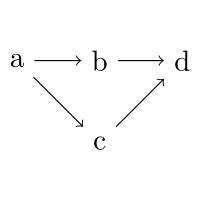

In [2]:
%%tikz -l graphs -s 200,200 -f svg
\graph { a -> {b, c} -> d};

## Concept: Node Chains

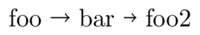

In [8]:
%%tikz -l graphs -s 200,200
every node/.style = draw
\graph {foo -> bar -> foo2};

### Multiple Chains

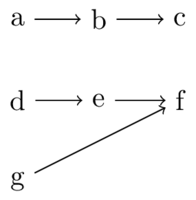

In [9]:
%%tikz -l graphs -s 200,200
\graph{
    a -> b -> c;
    d -> e -> f;
    g -> f;
};

## Node Text

The text associated with a node can be different from the node name. For this we can use the format `node-name/node-text`, where `node-text` can also be a latex math string. We can also use the `as` key: `node-name [as=node-text, ...]`.

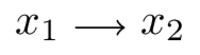

In [12]:
%%tikz -l graphs -s 200,200
\graph{
        x1/$x_1$ -> x2 [as=$x_2$]
};

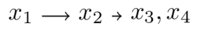

In [16]:
%%tikz -l graphs -s 200,200
\graph{
        x1/$x_1$ -> x2 [as=$x_2$] -> x34/{$x_3,x_4$};
};

In the above example, note that `x34` is a single node with the associated text $x_3, x_4$. However, this text must be put within curly braces `{}` because it contains a comma separator.

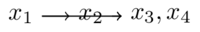

In [17]:
%%tikz -l graphs -s 200,200
\graph{
        x1/$x_1$ -> x2 [as=$x_2$] -> x34/{$x_3,x_4$};
        x1 -> x34;
};

## Bending Edges

That doesn't look too good, so we'll use the keys `out=` and `in=` to specify the angle at which the edge leaves the one node and enters another.

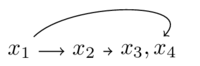

In [18]:
%%tikz -l graphs -s 200,200
\graph{
        x1/$x_1$ -> x2 [as=$x_2$] -> x34/{$x_3,x_4$};
        x1 -> [out=45,in=45] x34;
};

Note the asymmetric form of the edge connecting the nodes `x1` and `x34`. This can be fixed by setting the `in` angle to be 180 - `out` angle.

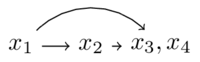

In [19]:
%%tikz -l graphs -s 200,200
\graph{
        x1/$x_1$ -> x2 [as=$x_2$] -> x34/{$x_3,x_4$};
        x1 -> [out=45,in=135] x34;
};

The same effect can be obtained by using the `bend left=<angle>` style

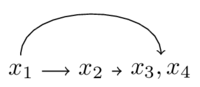

In [21]:
%%tikz -l graphs -s 200,200
\graph{
        x1/$x_1$ -> x2 [as=$x_2$] -> x34/{$x_3,x_4$};
        x1 -> [bend left = 90] x34;
};

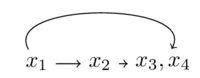

In [22]:
%%tikz -l graphs -s 200,200
\graph{
        x1/$x_1$ -> x2 [as=$x_2$] -> x34/{$x_3,x_4$};
        x1 -> [bend left = 120] x34;
};

The option `bend right` works the same as `bend left` only on the opposite side!

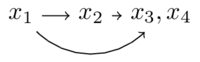

In [24]:
%%tikz -l graphs -s 200,200
\graph{
        x1/$x_1$ -> x2 [as=$x_2$] -> x34/{$x_3,x_4$};
        x1 -> [bend right = 45] x34;
};

## Concept: Chain Groups

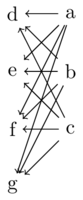

In [30]:
%%tikz -l graphs -s 200,200
\graph[grow left] {
    {a, b, c} -> [complete bipartite] {d, e, f, g};
};

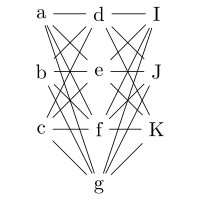

In [36]:
%%tikz -l graphs -s 200,200 -f svg
\graph[grow right] {
    {a, b, c} -- [complete bipartite] {d, e, f, g} -- [complete bipartite] {I, J, K} ;
};

## Customizing Vertex Positions

Reference: [Using matrices to position vertices of a graph](https://tex.stackexchange.com/a/358469/2064)

We can fine tune vertex positions by first using the `\node` command to create the vertices as nodes, using the `matrices` library to place the nodes as we wish and then using the `\graph` command with the `[use existing nodes]` setting to generate the edges.

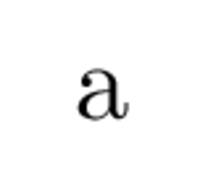

In [46]:
%%tikz -l graphs, matrices -s 200,200
\matrix{
    \node (a) {a}; \\
};

### Using `matrices` library

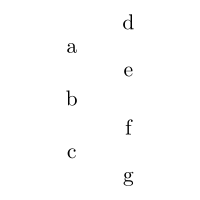

In [51]:
%%tikz -l graphs, matrices -s 200,200 -f svg
\matrix[column sep=5mm]{
                  & \node (d) {d}; \\
    \node (a) {a}; &  \\
                  & \node (e) {e}; \\
    \node (b) {b}; &   \\
                  & \node (f) {f}; \\
    \node (c) {c}; &   \\
                  & \node (g) {g}; \\
};

### Combine `matrices` with `graphs`

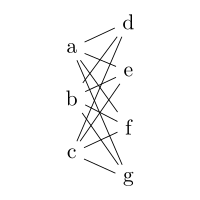

In [52]:
%%tikz -l graphs, matrices -s 200,200 -f svg
\matrix[column sep=5mm]{
                  & \node (d) {d}; \\
    \node (a) {a}; &  \\
                  & \node (e) {e}; \\
    \node (b) {b}; &   \\
                  & \node (f) {f}; \\
    \node (c) {c}; &   \\
                  & \node (g) {g}; \\
};
\graph [use existing nodes] {
      {a, b, c} -- [complete bipartite] {d, e, f, g};
};

## Tensor Networks with tikz

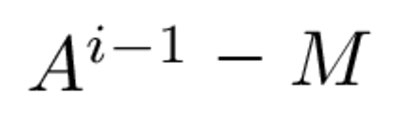

In [9]:
%%tikz -l graphs -s 400,400
%\tikz [every node/.style = draw]
\graph {A1 [as=$A^{i-1}$] -- M1 [as=$M$]};